In [7]:
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
import seaborn as sns

from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

In [8]:
xlsx = pd.ExcelFile('Otw4_mgr.xlsx')
df_train = pd.read_excel(xlsx, 'Arkusz2')
df_test = pd.read_excel(xlsx, 'Arkusz1')

# Performing EDA on Train set and Test set 

In [9]:
df_train.head()

,Vsand,Vlime,Vpiryt,Vkerogen,VCL,PHI,CAL,DT,LLD,LL3,GG_Core,GR,GRS_Core,NPHI_Core,POTA,THOR,URAN,RHOB,TOC
0,0.1515,0.0497,0.0006,0.0053,0.7863,0.0066,216.7687,74.6406,7.4101,7.6620,165.1193,158.5410,135.5706,0.259948,4.1251,11.2350,2.8859,2.6145,1.36
1,0.2049,0.0003,0.0008,0.0047,0.7817,0.0076,217.3275,79.0469,7.1200,7.0996,165.1093,160.1189,140.0381,0.251399,4.6601,12.1027,2.6390,2.6029,0.10
2,0.2205,0.0002,0.0007,0.0003,0.7713,0.0070,217.1293,78.3281,7.0894,6.8675,158.6258,152.0281,138.6958,0.244247,4.8669,11.2013,2.1004,2.6161,0.30
3,0.0002,0.1756,0.0006,0.0054,0.8122,0.0060,217.6831,78.5469,6.8309,6.7372,166.9451,152.2988,132.8525,0.274207,4.3596,10.3574,3.3759,2.6362,0.86
4,0.0580,0.1720,0.0006,0.0004,0.7572,0.0118,218.0057,78.1250,6.8198,6.6446,146.1019,147.7815,122.3833,0.259454,3.9793,10.7352,2.4160,2.6219,0.22


In [10]:
df_train.describe()

,Vsand,Vlime,Vpiryt,Vkerogen,VCL,PHI,CAL,DT,LLD,LL3,GG_Core,GR,GRS_Core,NPHI_Core,POTA,THOR,URAN,RHOB,TOC
count,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,34.000000,35.000000,35.000000,35.000000,35.00000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000
mean,0.055960,0.089611,0.004280,0.027840,0.815231,0.007077,217.743169,83.744491,11.939871,12.351689,194.087751,181.39024,145.743326,0.293788,4.519774,11.513640,4.393631,2.585526,2.297714
std,0.072562,0.096960,0.006175,0.045081,0.053240,0.005668,0.736027,8.475774,10.564558,10.693909,64.384158,51.96734,22.431829,0.055278,0.278910,1.416542,3.536165,0.105450,3.290360
min,0.000000,0.000000,0.000000,0.000100,0.669200,0.000000,216.720400,74.640600,5.935900,5.419400,137.076700,129.46500,111.315200,0.242666,3.979300,7.654300,1.094700,2.332000,0.100000
25%,0.000200,0.000300,0.000400,0.000200,0.776500,0.003800,217.091250,77.781225,6.496000,6.453200,153.226650,147.84340,130.558750,0.258005,4.320650,10.706250,2.315150,2.553100,0.180000
50%,0.000600,0.049700,0.000700,0.004700,0.806600,0.006600,217.683100,80.453100,6.876600,6.750100,165.109300,154.99450,140.038100,0.271260,4.508400,11.890600,2.796700,2.624300,0.560000
75%,0.122000,0.180450,0.006100,0.020000,0.865850,0.008600,218.259650,86.839875,9.450850,11.081150,192.224900,183.42645,165.350250,0.292808,4.642250,12.524350,4.073700,2.657100,2.920000
max,0.220500,0.315800,0.020900,0.122700,0.900200,0.026900,219.026700,100.515600,47.636300,44.772700,330.530300,285.90200,204.642900,0.417709,5.131300,14.298600,12.357300,2.697400,10.120000


In [11]:
df_train.shape

(35, 19)

E:\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='TOC', ylabel='Density'>

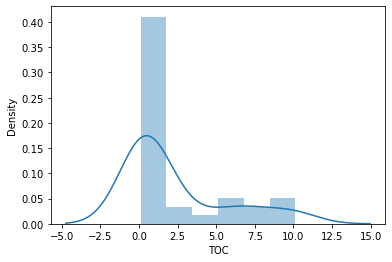

In [12]:
# Histogram of TOC
sns.distplot(df_train['TOC'])

E:\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='TOC', ylabel='Density'>

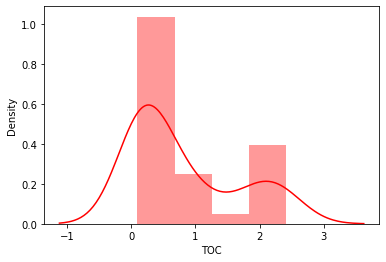

In [13]:
sns.distplot(np.log1p(df_train["TOC"]) , color = "r")

In [14]:
df_train.isnull().sum()

Vsand        0
Vlime        0
Vpiryt       0
Vkerogen     0
VCL          0
PHI          0
CAL          0
DT           1
LLD          0
LL3          0
GG_Core      0
GR           0
GRS_Core     0
NPHI_Core    0
POTA         0
THOR         0
URAN         0
RHOB         0
TOC          0
dtype: int64

In [15]:
#missing data Train set
total_train = df_train.isnull().sum().sort_values(ascending=False)
percent_train = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data_train = pd.concat([total_train, percent_train], axis=1, keys=['Total', 'Percent'])
missing_data_train.head(20)

,Total,Percent
DT,1,0.028571
TOC,0,0.000000
LLD,0,0.000000
Vlime,0,0.000000
Vpiryt,0,0.000000
Vkerogen,0,0.000000
VCL,0,0.000000
PHI,0,0.000000
CAL,0,0.000000
LL3,0,0.000000


In [16]:
df_test.describe()

,Vsand,Vlime,Vpiryt,Vkerogen,VCL,PHI,CAL,DT,LLD,LL3,GG_Core,GR,GRS_Core,NPHI_Core,POTA,THOR,URAN,RHOB,TOC
count,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,286.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,35.000000
mean,0.055261,0.110405,0.005065,0.016872,0.805848,0.006549,217.813744,81.863855,9.676185,10.062527,178.448302,169.119733,141.061207,0.281699,4.556348,11.427761,3.547804,2.610569,2.297714
std,0.071954,0.115123,0.007981,0.033469,0.076689,0.005418,0.809446,6.944101,8.386990,8.362479,50.760124,41.044119,20.936882,0.045912,0.346125,1.518463,2.718195,0.084999,3.290360
min,0.000000,0.000000,0.000000,0.000000,0.351000,0.000000,216.590900,69.609400,5.843000,5.230400,68.968300,100.021600,59.950400,0.149508,3.326500,6.624500,0.868600,2.324900,0.100000
25%,0.000200,0.000300,0.000500,0.000200,0.775950,0.002800,217.040500,77.167925,6.413125,6.354025,150.332150,144.864500,126.483275,0.258903,4.339625,10.347900,2.182725,2.590725,0.180000
50%,0.000700,0.090200,0.000800,0.001950,0.805400,0.005200,217.973900,79.882800,6.729850,6.662950,162.883000,154.990600,139.045950,0.269803,4.526450,11.590300,2.693550,2.636250,0.560000
75%,0.117775,0.196375,0.006925,0.011175,0.859500,0.009050,218.443150,83.289050,7.695750,8.683100,182.321250,169.928900,150.643450,0.286541,4.757775,12.508900,3.469650,2.663425,2.920000
max,0.233100,0.629600,0.043900,0.128800,0.952400,0.027100,221.043500,101.750000,50.231700,46.533300,336.001700,287.704300,205.955800,0.424293,5.295700,15.311200,12.357300,2.728600,10.120000


In [17]:
df_test.shape

(296, 19)

In [18]:
df_test.isnull().sum()

Vsand          0
Vlime          0
Vpiryt         0
Vkerogen       0
VCL            0
PHI            0
CAL            0
DT            10
LLD            0
LL3            0
GG_Core        0
GR             0
GRS_Core       0
NPHI_Core      0
POTA           0
THOR           0
URAN           0
RHOB           0
TOC          261
dtype: int64

In [19]:
#missing data Test set
total_test = df_test.isnull().sum().sort_values(ascending=False)
percent_test = (df_test.isnull().sum()/df_test.isnull().count()).sort_values(ascending=False)
missing_data_test = pd.concat([total_test, percent_test], axis=1, keys=['Total', 'Percent'])
missing_data_test.head(20)

,Total,Percent
TOC,261,0.881757
DT,10,0.033784
LLD,0,0.000000
Vlime,0,0.000000
Vpiryt,0,0.000000
Vkerogen,0,0.000000
VCL,0,0.000000
PHI,0,0.000000
CAL,0,0.000000
LL3,0,0.000000


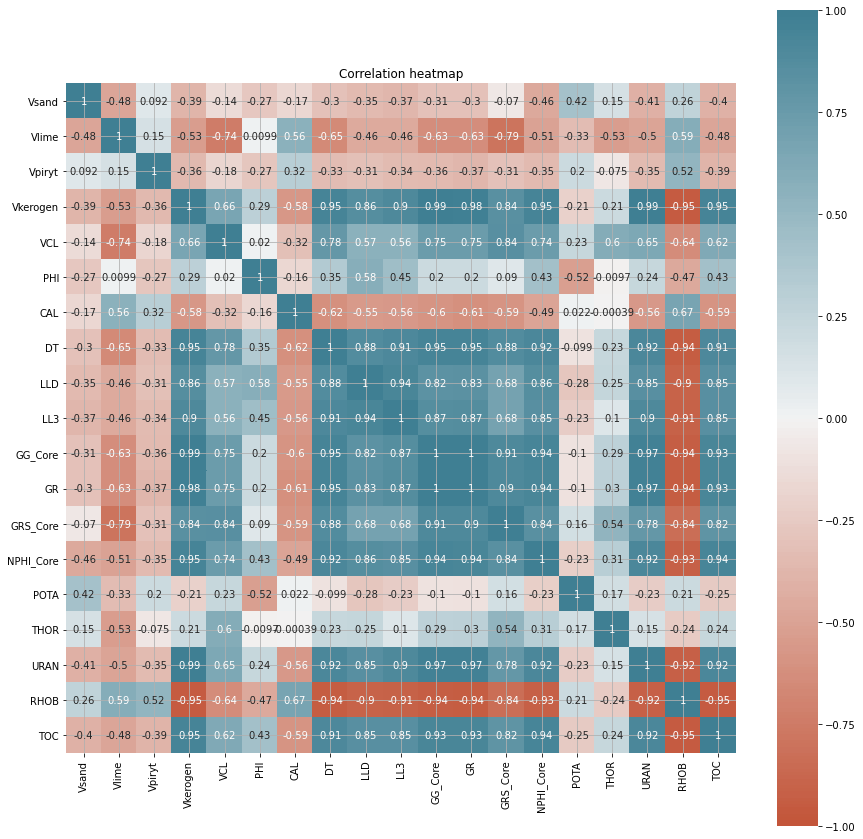

In [20]:
names = df_train.columns
corr_mat = df_train.corr(method='pearson')
fig, ax1 = plt.subplots(figsize=(15,15))
ax1 = sns.heatmap(corr_mat, 
                  center=0,
                  vmin = -1, 
                  vmax = 1, 
                  annot= True,
                  cmap= sns.diverging_palette(20,220, n=200), 
                  square=True, 
                  yticklabels=names, 
                  xticklabels=names)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
plt.title('Correlation heatmap')
plt.grid(b=True)

In [21]:
"""
#Visualzing 3 features with different levels of correlation with TOC
fig,ax = plt.subplots(3,1,figsize=(15,15))
sns.lineplot(x=df_train['Vkerogen'],y= df_train.TOC,ax=ax[0],color='r') 
sns.lineplot(x=df_train['THOR'], y=df_train.TOC,ax=ax[1],color='b')
sns.lineplot(x=df_train['RHOB'], y=df_train.TOC,ax=ax[2],color='g')
"""

"\n#Visualzing 3 features with different levels of correlation with TOC\nfig,ax = plt.subplots(3,1,figsize=(15,15))\nsns.lineplot(x=df_train['Vkerogen'],y= df_train.TOC,ax=ax[0],color='r') \nsns.lineplot(x=df_train['THOR'], y=df_train.TOC,ax=ax[1],color='b')\nsns.lineplot(x=df_train['RHOB'], y=df_train.TOC,ax=ax[2],color='g')\n"

In [22]:
"""# removing insignificant collumns from Training dataset and Predicting dataset
col_remove = ['Vsand', 'Vlime', 'Vpiryt', 'PHI', 'CAL', 'POTA', 'THOR', 'RHOB']
df_train = df_train.drop(columns= col_remove)
df_test = df_test.drop(columns= col_remove)
df_train.shape"""

"# removing insignificant collumns from Training dataset and Predicting dataset\ncol_remove = ['Vsand', 'Vlime', 'Vpiryt', 'PHI', 'CAL', 'POTA', 'THOR', 'RHOB']\ndf_train = df_train.drop(columns= col_remove)\ndf_test = df_test.drop(columns= col_remove)\ndf_train.shape"

In [23]:
"""#scatterplot
sns.set()
#cols = ['TOC', 'Vkerogen', 'VCL', 'DT', 'DT', 'LLD', 'LL3', 'GG_Core',
 #      'GR', 'GRS_Core', 'NPHI_Core', 'URAN']
sns.pairplot(df_train)
plt.show()"""

"#scatterplot\nsns.set()\n#cols = ['TOC', 'Vkerogen', 'VCL', 'DT', 'DT', 'LLD', 'LL3', 'GG_Core',\n #      'GR', 'GRS_Core', 'NPHI_Core', 'URAN']\nsns.pairplot(df_train)\nplt.show()"

# Multiple Linear Regression

In [24]:
from sklearn import linear_model
from scipy import stats
import statsmodels.api as sm
from sklearn.metrics import r2_score, mean_squared_error

In [25]:
# Preparing data for the model
df_train = df_train.fillna(0)

# logarithmic transformation
#df_train = np.log(df_train+1)

In [26]:
X= df_train.iloc[:, 0:-1].values
y= df_train.iloc[:,-1].values

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.20, random_state=0)
print(X_train.shape)
print(X_test.shape)

(28, 18)
(7, 18)


In [28]:
# get column names 
names = df_train.columns
# create the Scaler object
scaler = preprocessing.MinMaxScaler() # StandardScaler      MinMaxScaler
# fit data on the scaler object 
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test) 

In [29]:
X_test_scaled # MinMaxScaler

array([[ 8.20408163e-01, -3.50197302e-17,  6.17224880e-01,
         9.57095710e-02,  5.36796537e-01,  4.46096654e-02,
         9.58244808e-02,  8.29006642e-01,  9.69671214e-02,
         1.08893028e-01,  2.07298816e-01,  2.44697147e-01,
         4.60872954e-01,  5.13791527e-02,  5.62065972e-01,
         6.74150558e-01,  1.95319020e-01,  7.98303229e-01],
       [ 9.07029478e-04,  7.21254355e-01,  2.00956938e-01,
         8.25082508e-04,  3.59307359e-01,  5.72490706e-01,
         9.62580757e-01,  7.79107920e-01,  3.60382423e-03,
         1.77215126e-02, -1.43899148e-02, -6.31326998e-02,
         1.91319476e-01,  2.45499279e-01,  2.38541667e-01,
         4.54316244e-01,  6.61481363e-03,  8.51122058e-01],
       [ 2.66213152e-01,  1.44440925e-01,  9.52153110e-01,
         2.28983499e-16,  8.72727273e-01,  1.78438662e-01,
         6.01352816e-01,  8.17970544e-01,  5.44775295e-03,
         2.02981707e-02,  1.32269598e-01,  1.07025482e-01,
         4.65589815e-01,  2.54847958e-01,  8.01562500e

In [30]:
X_train_scaled1 = sm.add_constant(X_train_scaled)
X_test_scaled1 = sm.add_constant(X_test_scaled)

model1 = sm.OLS(y_train, X_train_scaled1).fit()

print_model1 = model1.summary(xname=['Constant','Vsand [%]',	'Vlime [%]',	'Vpiryt [%]',
                                   'Vkerogen [%]',	'VCL [%]',	'PHI [%]',	'CAL [mm]',
                                   'DT [m/ft]',	'LLD [ohmm]',	'LL3 [ohmm]',	'GG_Core [API]',
                                   'GR [API]',	'GRS_Core [API]',	'NPHI_Core [%]',	'POTA [%]',
                                   'THOR [%]',	'URAN [%]', 'RHOB [g/cc]'])
print(print_model1)


"""Adj. R-squared < R-squared indicate that the model is too complex, 
it can reduce the precision of coefficient estimates and predicted values"""

#https://www.investopedia.com/ask/answers/012615/whats-difference-between-rsquared-and-adjusted-rsquared.asp
#https://statisticsbyjim.com/regression/interpret-adjusted-r-squared-predicted-r-squared-regression/ 

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     19.40
Date:                Sat, 05 Feb 2022   Prob (F-statistic):           1.86e-05
Time:                        23:38:37   Log-Likelihood:                -22.414
No. Observations:                  28   AIC:                             80.83
Df Residuals:                      10   BIC:                             104.8
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Constant          13.1298      7.130      1.

'Adj. R-squared < R-squared indicate that the model is too complex, \nit can reduce the precision of coefficient estimates and predicted values'

[ 0.01070303 -0.27033801  7.51464451  7.82965401  3.54835441  1.66628611
  6.18359756  1.22702919  0.17173581  0.09743496  0.68499354  0.34741424
  0.67618589  1.19126274  9.66485481  0.79765503  0.21332198  0.61900896
  6.59617574  1.65128742  0.26073992  9.62743856  0.25367422  0.22897587
  0.65643977  0.95434924  0.39604928  0.40107121] [ 0.82970339  1.19185437 -0.17818123  7.4620491  10.88328197  0.35833118
  1.02668588]
R2 score on train set: 	0.971
R2 score on test set: 	0.936
MSE score on train set:	0.290
MSE score on test set: 	0.843


'The model is overfitted'

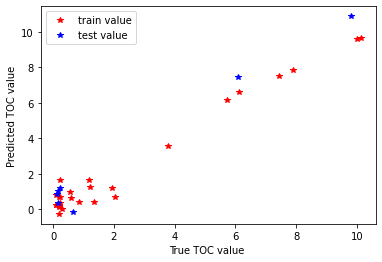

In [31]:
y_pred_train1 = model1.predict(X_train_scaled1)
y_pred_test1 = model1.predict(X_test_scaled1)

score1 = r2_score(y_train, y_pred_train1)
score2 = r2_score(y_test, y_pred_test1)
mse1 = mean_squared_error(y_train, y_pred_train1)
mse2 = mean_squared_error(y_test, y_pred_test1)

print(y_pred_train1, y_pred_test1)
print('R2 score on train set: \t{:0.3f}'.format(score1))
print('R2 score on test set: \t{:0.3f}'.format(score2))
print('MSE score on train set:\t{:0.3f}'.format(mse1))
print('MSE score on test set: \t{:0.3f}'.format(mse2))

#plt.plot(y_train, 'ro', label='true value')
#plt.plot(y_pred_train1, 'b*', label='pred value')
#plt.legend(loc='upper left')
#print('True value: ', y[8])
#print('Predicted value: \t{:0.2f}'.format(model1.predict(y[8])))

plt.plot(y_train, y_pred_train1, 'r*', label='train value')
plt.plot(y_test, y_pred_test1, 'b*', label='test value')
plt.xlabel('True TOC value ')
plt.ylabel('Predicted TOC value')
plt.legend()


"""The model is overfitted"""

# Predict unknown data for the whole dataset

In [32]:
# fill NaN for Test set
df_test = df_test.fillna(0)
#df_test = np.log1p(df_test)

# get the data for predictions
rows = df_test.iloc[:, 0:-1].values

# fit data on the scaler object
rows = scaler.transform(rows) 

In [33]:
# make prediction for unknown TOC values
rows_add = sm.add_constant(rows)
rows_pred = model1.predict(rows_add)
TOC_col = pd.DataFrame(rows_pred, columns=['pred_TOC'])
TOC_col = TOC_col.round(decimals=2)
TOC_col.to_excel('MLP_pred.xlsx')
print(TOC_col.head(60))

    pred_TOC
0       1.18
1       1.68
2       2.13
3       2.76
4       2.02
5       0.40
6       0.13
7       0.38
8       0.35
9       0.41
10      0.47
11      0.80
12      0.73
13      0.43
14     -0.04
15     -0.54
16     -0.54
17     -0.22
18      0.28
19      0.41
20      0.01
21     -0.90
22     -1.45
23     -1.60
24     -2.05
25     -2.05
26     -1.49
27     -0.91
28     -0.34
29     -0.11
30      0.40
31      0.17
32     -0.48
33     -0.37
34      0.01
35      0.39
36      0.56
37     -0.16
38     -0.79
39     -0.55
40      0.38
41      1.03
42      1.65
43      2.13
44      2.49
45      2.14
46      1.65
47      1.01
48      0.58
49      0.56
50      0.68
51      0.59
52      0.62
53      0.52
54      0.24
55      0.08
56      0.07
57      0.13
58      0.14
59      0.30
